## Tensor Flow basic : Lab 11
### Convolutional Neural Network (CNN) example
Make small piece of image (or data) then use them as input to construct ConvNet. Then use each of this output to train using ReLU etc.

How big output size? Let $N$ be a spatial dimension of data and $F$ be a output then output size will be $(N-F)/stride+1$ where stride is how many pixels that filter moves along the spatial dimension of data. For example, $N=7, F=3$, stride 1 makes 5 so we have $5 \times 5$ output. But for stride 3, we have 2.33 which is invalid because output dimension should be natural number.

In practice, we will get smaller output then original input because of this i.e. there are some possibility of losing data. So, we put zero pad the border to prevent this. For example, consider $7 \times 7$ input with $3 x 3$ filter applied with stride 1. In this case, we will get $5 \times 5$ output. Now let's pad with 1 pixel border. Then output will be $9 \times 9$ instead of $7 \times 7$ then we get $7 \times 7$ output. Generally, it is common to see Conv layers with stride 1, filters of size $F \times F$, and zero-padding will $(F-1)/2$. (This will preserve size spatially)

There are several additional concepts for ConvNet. First, we discuss about pooling. Naively, pooling layer would be sampling for conv layer. For example, consider $4 \times 4$ input with $2 \times 2$ filters and stride 2. We will have $2 \times 2$ output. Here, we apply max pool which collects maximum data on each filter. This makes our sample layer.

Next, we talk about fully connected layer (FC layer). FC layer contains neurons that connect to the entire input volume as in ordinary neural networks.

There is good demo `ConvNetJS` which is training on `CIFAR-10` :
https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


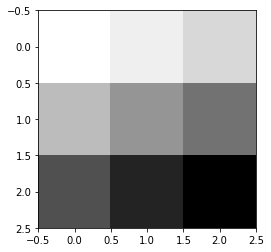

In [7]:
# Let's do some simple convolution layer
# In this example, we use 3x3x1 as an image and 2x2x1 for filter
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show() # Show image

Above image represents how our data graphically i.e :

1,2,3

4,5,6

7,8,9

That fills above squares. We have Image : 1,3,3,1 and we want to use Filter 2,2,1,1 (first two numbers indicate size of filter, third one indicates color of image in this example 1, and last one indicates number of filters), stride 1x1, padding Valid in this example

![title](img/cnn_img1.png)

Below code show how to implement this

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


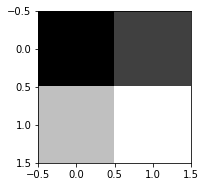

In [13]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.get_shape()) # >1.0 version support weigth.shape instead of weight.get_shape()
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID') # This make 2x2 filter

# Check our filter
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')
    plt.show()

Now, we are giving `Padding`. In tf, `Padding : same` makes same size as input image

![title](img/cnn_img2.png)

Below code show how to implement this

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


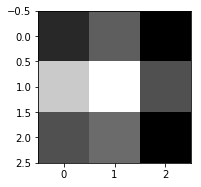

In [18]:
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.get_shape())
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME') # Now we put SAME tag in padding

# Check our fileter
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show()


image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


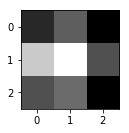

[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]


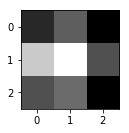

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


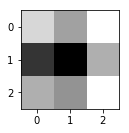

In [21]:
# We can make it more filters instead of just 1 filter

print("image.shape", image.shape)

# We make 3 filters by giving 3 weight values
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.get_shape())
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')

# Check our filters
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show()

So far, we construct our filters. Now, we are doing **pooling** for sampling like below picture. In this example, we are doing max pooling

![title](img/maxpool.png)

In [24]:
# In this example, we are also use SAME tag in padding. If we put VALID tag, we will get 2x2 pool 
# (like top-left corner pic of above first pic)
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.get_shape())
print(pool.eval()) # Evaluate our pooling, should give biggest value.

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


In [25]:
# Now call MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../data/MNIST_data/", one_hot=True)

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz


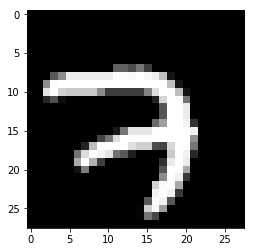

In [27]:
# Choose training image
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

Tensor("Conv2D_11:0", shape=(1, 14, 14, 5), dtype=float32)


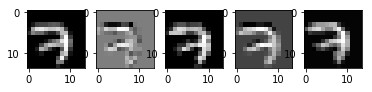

In [28]:
# Make it to pass conv layers
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1) # Define the image, -1 implies choose by machine. It has only one color
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01)) #it means : 3x3 filter, has one color, use 5 filter
# Define conv layer
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME') # Moving 2 pixels (stride = 2) and using padding

# Check our conv layer (or say filter)
print(conv2d) 
# Plot to see it
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')
plt.show()

Tensor("MaxPool_3:0", shape=(1, 7, 7, 5), dtype=float32)


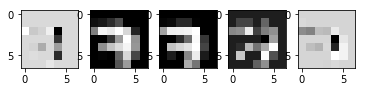

In [29]:
# Doing max pooling
# Deine pool
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')

#Check out our 
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')
plt.show()

This is how we can generate conv layer and pooling. Now, perform actual testing

In [30]:
%reset -f

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph() # Remove all graphs

mnist = input_data.read_data_sets("../data/MNIST_data/", one_hot=True)

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz


Learning started. It takes sometime.
Epoch: 0001 cost = 0.373611690
Epoch: 0002 cost = 0.096936973
Epoch: 0003 cost = 0.073735051
Epoch: 0004 cost = 0.058425934
Epoch: 0005 cost = 0.048934135
Epoch: 0006 cost = 0.042168371
Epoch: 0007 cost = 0.036875911
Epoch: 0008 cost = 0.032603908
Epoch: 0009 cost = 0.028291940
Epoch: 0010 cost = 0.026001773
Epoch: 0011 cost = 0.022164489
Epoch: 0012 cost = 0.020504080
Epoch: 0013 cost = 0.017359324
Epoch: 0014 cost = 0.015485093
Epoch: 0015 cost = 0.014671810
Learning Finished!
Accuracy: 0.9887
Label:  [8]
Prediction:  [8]


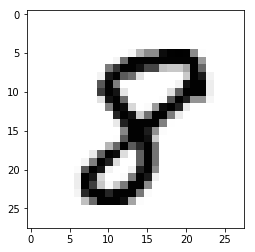

In [2]:
# In this exmaple, we make a simple CNN like below:
# input layer -> conv1 -> pooling1 -> conv2 -> pooling2 -> fc layer

learning_rate = 0.001
training_epochs = 15
batch_size = 100

# First conv layer
# input place holders
X = tf.placeholder(tf.float32, [None, 784]) 
# Reshape it to make for image input
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # 3x3 filter, 1 color, 32 filters
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME') # stride = 1, applying padding
L1 = tf.nn.relu(L1) # use relu activation function
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME') # we are using maxpooling
# this make 14x14x32 
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
'''

# Second conv layer
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64]) # Make multi-dim object to 1-dim for fc layer
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
'''

# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

# below is same as previous example
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()